### Welcome to the Airbnb Mini Practice Project

Throughout this unit on Python Data Analytics, you'be been introduced the the following powerful libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
Each of these libraries will enhance your data analysis capabilities.

We've created this challenging exercise to reinforce your understanding of how these libraries work. 

Please note, there is a particular emphasis on the Pandas Library. This is the most critical Python library for data analytics. You'll see many similarities between Pandas and Pivot Tables!
    
<b> The most important thing you can do to build confidence with Python is to practice programming, all the time. This way you will build muscle memory. Don't simply copy the code you've written previously. Write it again and again so you store it in your memory. </b> 

<b> As this is a practice exercise, we've included a copy of what the outputs *should* look like for the majority of the questions to give you some guidance. </b>

<H3>  Time to get started! </H3>

Import the airbnb_2.csv file.

Once you do this, you can start your analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below. </b>


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

Now that you have the Pandas Libraries imported, it's time to import the Airbnb dataset.

<b> i) Import the Airbnb dataset.

ii) Use .info() function to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [20]:
abnb_db = pd.read_csv(r'airbnb_2.csv')

In [69]:
abnb_db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas DataFrame using [] and boolean operators </li>
<li> Summing up records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many Airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island), then identify which Neighbourhood Groups have the greatest number of Airbnb listings. </b>
<p>
    <b> Put your code in the box below </b>

In [109]:
abnb_neighbourhoods['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

We want to focus our attention on the 3 most popular Neighbourhood Groups, by listing volume.

<b> ii) Calculate the percentage of Airbnb listings that each Neighbourhood Group contains. </b>

See this resource for more details <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>. </a>

<b> Put your code in the box below. </b>

In [107]:
abnb_neighbourhoods['neighbourhood_group'].value_counts(normalize = True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

<b> iii) Create a new calculated field called Revenue and place this into the Airbnb DataFrame. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [110]:
abnb_db['revenue'] = abnb_db['price'] * abnb_db['number_of_reviews']

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to this <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> DataCamp link</a>. Specifically, Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below. </b>

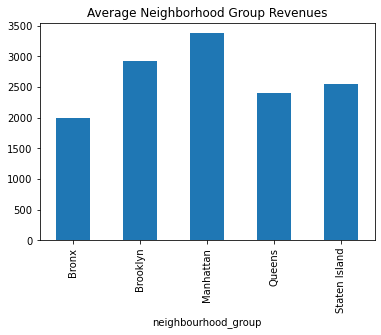

In [143]:
abnb_nb_rv = abnb_neighbourhoods.groupby(['neighbourhood_group'])['revenue'].mean()
abnb_nb_rv.plot(kind='bar', title = 'Average Neighborhood Group Revenues')
plt.show()

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb DataFrame to include only the Neighbourhood Groups Manhattan, Brooklyn, and Queens. 
    
Then, identify the top 3 Revenue Generating Neighborhoods within each of the 3 Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the DataFrame using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
<b> Put your code in the box below. </b>

In [149]:
nh_group = abnb_db[abnb_db['neighbourhood_group'].isin(['Brooklyn','Manhattan','Queens'])]

nhg_revenues = nh_group.groupby(['neighbourhood_group','neighbourhood']).sum()['revenue'].sort_values(ascending=False).reset_index()

brooklyn = nhg_revenues[nhg_revenues['neighbourhood_group']=="Brooklyn"].head(3)
manhattan = nhg_revenues[nhg_revenues['neighbourhood_group']=="Manhattan"].head(3)
queens = nhg_revenues[nhg_revenues['neighbourhood_group']=="Queens"].head(3)

combined= pd.concat([brooklyn,manhattan,queens])
combined

,neighbourhood_group,neighbourhood,revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
8,Brooklyn,Bushwick,4762224
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


<b> VI) Filter the Airbnb Dataframe to include only the top 3 Neighbourhoods within each neighbourhood_group. 
    
After doing this, identify the top average revenue-generating room-type for each of the nine neighbourhoods and plot this  in a Bar Chart.</b>

This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
 <b> Put your code in the box below. </b>      

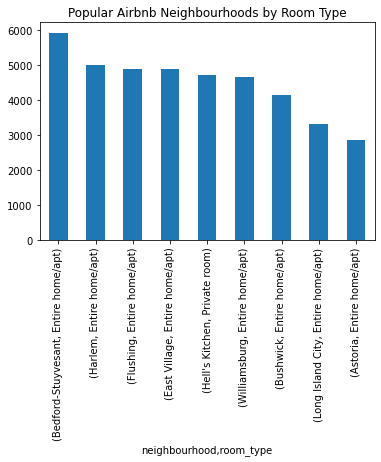

In [170]:
nh_df = abnb_db.loc[abnb_db['neighbourhood'].isin(list(combined['neighbourhood']))]

nh_df = nh_df.groupby(['neighbourhood','room_type']).mean().sort_values(by=['revenue'],ascending=False)['revenue'].groupby(['neighbourhood']).head(1).plot(kind='bar')

plt.title("Popular Airbnb Neighbourhoods by Room Type")
plt.show()
